In [ ]:
import json
import os
import pandas as pd
import re
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline 
import seaborn as sns
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


In [ ]:

# setting directory
#directory = r'C:\Users\eleni.apostolopoulou\OneDrive - York St John University\University - updated\Year 3\3rd year work based project\work based project\reports'
directory = r'C:\Users\Eleni.Apostolopoulo\OneDrive - Oxford Instruments plc\Documents\Evidence for thesis\Evidence'



# In[107]:

data = {}
url = []
total = []
script_size = []
im_size = []
font_size = []
stylesheet = []
media = []
total_png_size = []
total_jpg_size = []
total_svg_size = []
no_png = []
no_jpg = []
no_svg = []

json_files = [pos_json for pos_json in os.listdir('reports/') if pos_json.endswith('.json')] # scans directory and opens json report files one at a time

for index, js in enumerate(json_files):
    with open(os.path.join(directory, js),encoding='utf-8') as json_file:
        data = json.load(json_file)
        #print(data["requestedUrl"])
        url.append(data["requestedUrl"])
        try:
        
            rs = data["audits"]["resource-summary"]['details']['items'] #locates items in the resource summary audit
            rs2 = data["audits"]["network-requests"]['details']['items'] #locates items in the network requests audit
            for el in rs: # extracts relevant items and appends them to their individual lists 
        
                if el['resourceType'] =='image' or el['resourceType'] =='Image' :
            
                    im_size.append(el['transferSize'])
                if el['resourceType'] =='font' or el['resourceType'] =='Font':
                    font_size.append(el['transferSize'])
                if el['resourceType'] =='script':
                    script_size.append(el['transferSize'])
                if el['resourceType'] =='stylesheet':
                    stylesheet.append(el['transferSize'])
                if el['resourceType'] =='media':
                    media.append(el['transferSize'])
                if el['resourceType'] =='total':
                    total.append(el['transferSize'])
            png_size = 0
            jpg_size = 0        
            png_size = 0
            svg_size = 0
            jpg_size = 0  
            no_png_el =0
            no_jpg_el =0
            no_svg_el =0
            for el in rs2:

                if el['mimeType'] =='image/png':  
                        png_size = png_size+el['transferSize']
                        no_png_el = no_png_el+1
                if "image/svg" in el['mimeType'] :  
                    svg_size = svg_size+el['transferSize']
                    no_svg_el = no_svg_el +1
                if "image/jpeg" in el['mimeType'] :  
                    jpg_size = jpg_size+el['transferSize']
                    no_jpg_el = no_jpg_el +1
            total_png_size.append(png_size)
            total_jpg_size.append(jpg_size)
            total_svg_size.append(svg_size)
            no_png.append(no_png_el)
            no_jpg.append(no_jpg_el)
            no_svg.append(no_svg_el)

        
        except KeyError:
            
                im_size.append(None)
                font_size.append(None)
                
                script_size.append(None)
                
                stylesheet.append(None)
                
                media.append(None)
                
                total.append(None)
                total_png_size.append(None)
                total_jpg_size.append(None)
                total_svg_size.append(None)
                no_png.append(None)
                no_jpg.append(None)
                no_svg.append(None)
    
d = {
    "url": url, "image_size": im_size, "font_size":font_size , "script_size": script_size, "stylesheet_size": stylesheet, "media_size":media,
     "total_page_size":total  ,"png_size" : total_png_size,"jpeg_size" : total_jpg_size,"svg_size" : total_svg_size,'no_png' :no_png,'no_jpeg': no_jpg,'no_svg': no_svg}
df = pd.DataFrame(d) #stores dict in a dataframe 
print(df)


In [10]:
df.image_size.sum()

843357895.0

In [7]:
df.font_size.sum(),df.image_size.sum()

(1109057116.0, 843357895.0)

In [19]:
df.head()

,url,image_size,font_size,script_size,stylesheet_size,media_size,total_page_size,png_size,jpeg_size,svg_size,...,no_jpeg,no_svg,test(),test(hello),test$hello),test'hello),test\hello),test\£),test£),test&)
0,https://www.jisc.ac.uk/about,382674.0,243013.0,574659.0,182252.0,0.0,1396208.0,380698.0,0.0,1976.0,...,0.0,8.0,1,1,1,1,1,1,1,1
1,https://www.jisc.ac.uk/about/corporate/gender-...,465254.0,243036.0,582986.0,182257.0,0.0,1485855.0,463141.0,0.0,1981.0,...,0.0,3.0,1,1,1,1,1,1,1,1
2,https://www.jisc.ac.uk/blog/new-survey-shows-a...,72707.0,243030.0,582984.0,182251.0,0.0,1092585.0,70729.0,0.0,1978.0,...,0.0,2.0,1,1,1,1,1,1,1,1
3,https://www.jisc.ac.uk/guides/ZGlnaXRhbC,74659.0,260622.0,547630.0,182255.0,0.0,1077387.0,72684.0,0.0,1975.0,...,0.0,5.0,1,1,1,1,1,1,1,1
4,https://www.jisc.ac.uk/hairdressing-training,127074.0,243020.0,574619.0,182262.0,0.0,1139174.0,70728.0,54367.0,1979.0,...,2.0,2.0,1,1,1,1,1,1,1,1


In [20]:
len(d['url']),len(d['script_size']),len(d['media_size']),len(d['svg_size']),len(d['png_size']),len(d['jpeg_size'])

(4211, 3682, 3682, 3665, 3665, 3665)

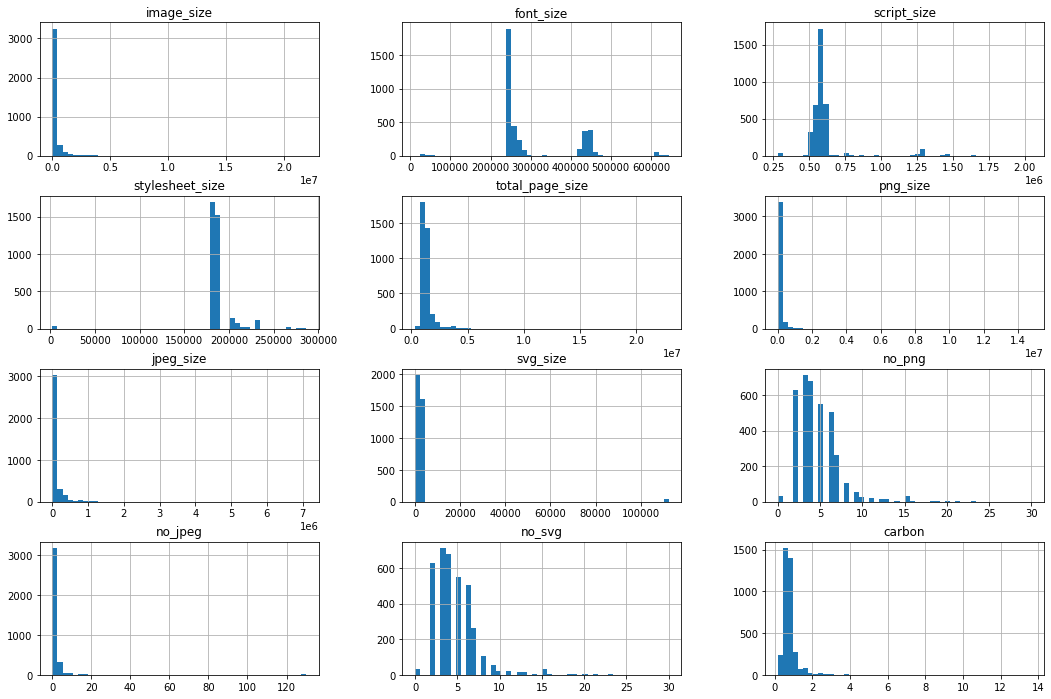

In [136]:

df.hist(bins=50, figsize=(18,12))
plt.show()

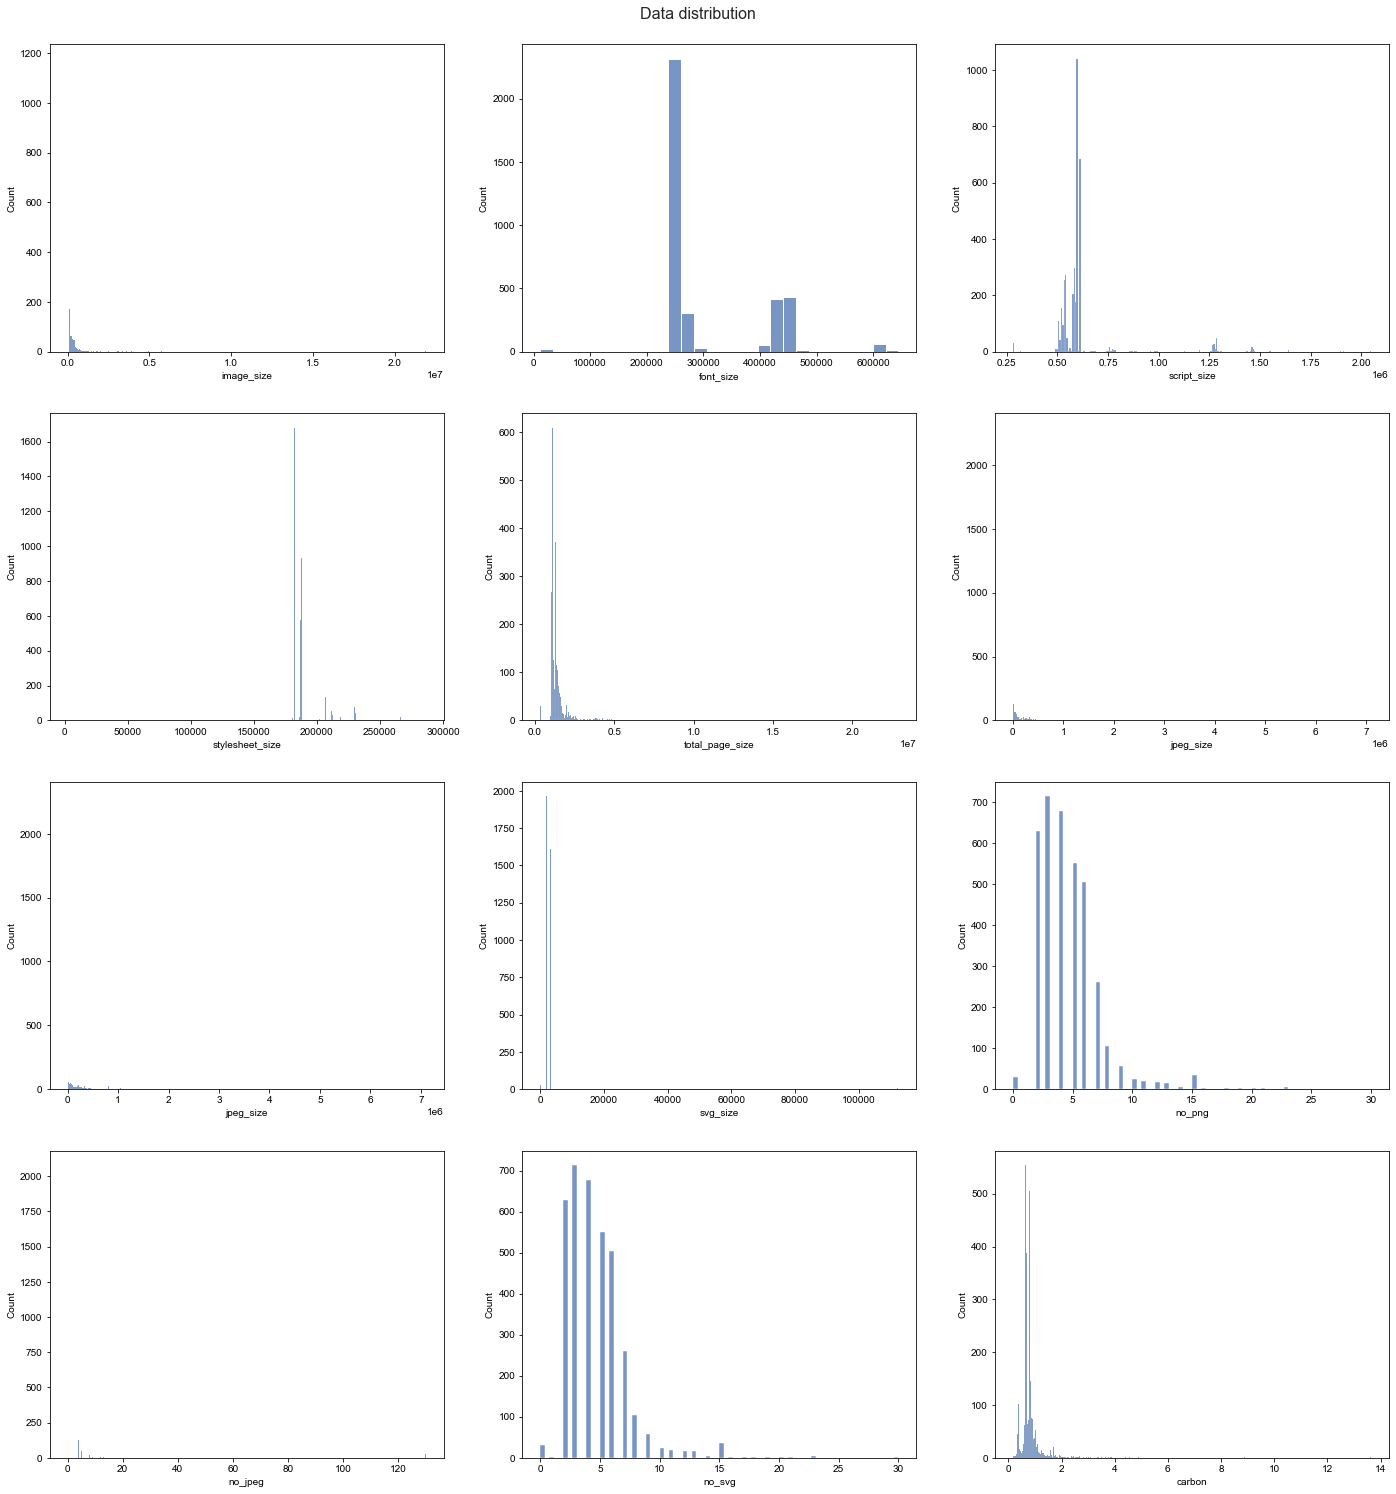

In [184]:
fig, ax =plt.subplots(4,3, figsize=(24
                                    , 26))
   
sns.set( {'axes.labelsize' : 16 })
sns.histplot(ax = ax[0,0], x = df['image_size'])

sns.histplot(ax = ax[0,1], x = df['font_size'])

sns.histplot(ax = ax[0,2], x = df['script_size'])

sns.histplot(ax = ax[1,0], x = df['stylesheet_size'])

sns.histplot(ax = ax[1,1], x = df['total_page_size'])

sns.histplot(ax = ax[1,2], x = df['jpeg_size'])

sns.histplot(ax = ax[2,0], x = df['jpeg_size'])

sns.histplot(ax = ax[2,1], x = df['svg_size'])

sns.histplot(ax = ax[2,2], x = df['no_png'])

sns.histplot(ax = ax[3,0], x = df['no_jpeg'])

sns.histplot(ax = ax[3,1], x = df['no_svg'])

sns.histplot(ax = ax[3,2], x = df['carbon'])


fig.suptitle('Data distribution', y =0.9, size = 16)  

plt.savefig('data_vis.png')

In [3]:
# load carbon footprint
carbon = pd.read_excel(r'C:\Users\eleni.apostolopoulou\OneDrive - York St John University\University - updated\Year 3\3rd year work based project\work based project\page_carbon.xlsx')

In [13]:
carbon.head()

,Unnamed: 0,page,carbon
0,195,https://www.jisc.ac.uk/about,0.73
1,583,https://www.jisc.ac.uk/about/certification,0.71
2,1090,https://www.jisc.ac.uk/about/corporate,0.70
3,1196,https://www.jisc.ac.uk/about/corporate/annual-...,6.82
4,260,https://www.jisc.ac.uk/about/corporate/board,0.90


In [26]:
allData = df.merge(carbon, left_on='url', right_on='page') # merge carbon data with lighthouse data  

In [4]:
carbon.describe()

,Unnamed: 0,carbon
count,2956.000000,2956.000000
mean,1556.440460,0.897165
std,937.137681,0.713566
min,0.000000,0.050000
25%,781.500000,0.660000
50%,1513.500000,0.720000
75%,2261.250000,0.870000
max,3549.000000,13.640000


In [25]:
allData.head()

,Unnamed: 0,url,image_size,font_size,script_size,stylesheet_size,media_size,total_page_size,Unnamed: 0.1,page,carbon
0,0,https://www.jisc.ac.uk/about,382674.0,243013.0,574659.0,182252.0,0.0,1396208.0,195,https://www.jisc.ac.uk/about,0.73
1,1,https://www.jisc.ac.uk/about/corporate/gender-...,465254.0,243036.0,582986.0,182257.0,0.0,1485855.0,175,https://www.jisc.ac.uk/about/corporate/gender-...,0.90
2,2,https://www.jisc.ac.uk/blog/new-survey-shows-a...,72707.0,243030.0,582984.0,182251.0,0.0,1092585.0,1990,https://www.jisc.ac.uk/blog/new-survey-shows-a...,0.66
3,3,https://www.jisc.ac.uk/guides/ZGlnaXRhbC,74659.0,260622.0,547630.0,182255.0,0.0,1077387.0,1110,https://www.jisc.ac.uk/guides/ZGlnaXRhbC,0.65
4,4,https://www.jisc.ac.uk/hairdressing-training,127074.0,243020.0,574619.0,182262.0,0.0,1139174.0,17,https://www.jisc.ac.uk/hairdressing-training,0.69


In [31]:
allData.describe()

,Unnamed: 0,image_size,font_size,script_size,stylesheet_size,media_size,total_page_size,png_size,jpeg_size,svg_size,no_png,no_jpeg,no_svg,Unnamed: 0.1,carbon
count,3679.000000,3.664000e+03,3664.000000,3.664000e+03,3664.000000,3.664000e+03,3.664000e+03,3.664000e+03,3.664000e+03,3664.000000,3664.000000,3664.000000,3664.000000,3679.000000,3679.000000
mean,1839.000000,2.301542e+05,302617.944596,6.110423e+05,187238.040393,1.540634e+04,1.368479e+06,1.342638e+05,9.026053e+04,4040.209061,4.611900,2.292576,4.611900,1657.396032,0.811995
std,1062.180148,5.174907e+05,96367.963334,1.638143e+05,21450.751286,1.921887e+05,6.403516e+05,3.353179e+05,2.823646e+05,12667.807649,2.578821,11.708820,2.578821,1006.980485,0.457876
min,0.000000,0.000000e+00,11666.000000,2.810810e+05,2227.000000,0.000000e+00,3.346830e+05,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.170000
25%,919.500000,7.746950e+04,243037.000000,5.451308e+05,182256.000000,0.000000e+00,1.097904e+06,7.073200e+04,0.000000e+00,1978.000000,3.000000,0.000000,3.000000,794.000000,0.650000
50%,1839.000000,8.478100e+04,246657.500000,5.951620e+05,187567.000000,0.000000e+00,1.238964e+06,7.425600e+04,0.000000e+00,1982.000000,4.000000,0.000000,4.000000,1642.000000,0.720000
75%,2758.500000,2.257682e+05,422659.250000,5.988765e+05,187618.000000,0.000000e+00,1.389690e+06,7.800200e+04,6.176675e+04,3236.000000,6.000000,1.000000,6.000000,2433.500000,0.840000
max,3678.000000,2.187387e+07,644486.000000,2.047033e+06,286173.000000,4.670306e+06,2.290657e+07,1.477724e+07,7.094655e+06,112434.000000,30.000000,130.000000,30.000000,3549.000000,13.640000


In [38]:
allData.to_excel('allData.xlsx', sheet_name='sheet1')

In [12]:
allData = pd.read_excel(r'C:\Users\eleni.apostolopoulou\OneDrive - York St John University\University - updated\Year 3\3rd year work based project\work based project\allData2.xlsx')

In [7]:
allData[allData['total_page_size'].isnull()]['url']

58                          https://www.jisc.ac.uk/assent
253     https://www.jisc.ac.uk/blog/we-have-the-eviden...
278          https://www.jisc.ac.uk/cloud/aws-partnership
294         https://www.jisc.ac.uk/cloud-managed-services
455     https://www.jisc.ac.uk/events/digifest-10-mar-...
695     https://www.jisc.ac.uk/forms/sign-up-for-our-o...
792           https://www.jisc.ac.uk/geant-iaas-framework
2488        https://www.jisc.ac.uk/progression-through-he
2494                   https://www.jisc.ac.uk/public-wifi
2631    https://www.jisc.ac.uk/reports/assessment-rebo...
3440             https://www.jisc.ac.uk/staff/jo-robotham
3594    https://www.jisc.ac.uk/training/making-your-di...
3595    https://www.jisc.ac.uk/training/making-your-di...
3626                        https://www.jisc.ac.uk/vscene
3675            https://www.jisc.ac.uk/workforce-explorer
Name: url, dtype: object

In [4]:
allData =allData.drop('Unnamed: 0',axis = 1)
allData =allData.drop('Unnamed: 0.1',axis = 1)

In [17]:
allData.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,Unnamed: 0,image_size,font_size,script_size,stylesheet_size,media_size,total_page_size,png_size,jpeg_size,svg_size,no_png,no_jpeg,no_svg,Unnamed: 0.1,carbon
count,3679.00000,3664.00000,3664.00000,3664.00000,3664.00000,3664.00000,3664.00000,3664.00000,3664.00000,3664.00000,3664.00000,3664.00000,3664.00000,3679.00000,3679.00000
mean,1839.00000,230154.17058,302617.94460,611042.31359,187238.04039,15406.34116,1368478.98253,134263.76665,90260.53439,4040.20906,4.61190,2.29258,4.61190,1657.39603,0.81200
std,1062.18015,517490.73901,96367.96333,163814.26231,21450.75129,192188.74099,640351.63280,335317.90409,282364.57432,12667.80765,2.57882,11.70882,2.57882,1006.98048,0.45788
min,0.00000,0.00000,11666.00000,281081.00000,2227.00000,0.00000,334683.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.17000
25%,919.50000,77469.50000,243037.00000,545130.75000,182256.00000,0.00000,1097903.75000,70732.00000,0.00000,1978.00000,3.00000,0.00000,3.00000,794.00000,0.65000
50%,1839.00000,84781.00000,246657.50000,595162.00000,187567.00000,0.00000,1238964.50000,74256.00000,0.00000,1982.00000,4.00000,0.00000,4.00000,1642.00000,0.72000
75%,2758.50000,225768.25000,422659.25000,598876.50000,187618.00000,0.00000,1389690.00000,78002.00000,61766.75000,3236.00000,6.00000,1.00000,6.00000,2433.50000,0.84000
max,3678.00000,21873874.00000,644486.00000,2047033.00000,286173.00000,4670306.00000,22906571.00000,14777237.00000,7094655.00000,112434.00000,30.00000,130.00000,30.00000,3549.00000,13.64000


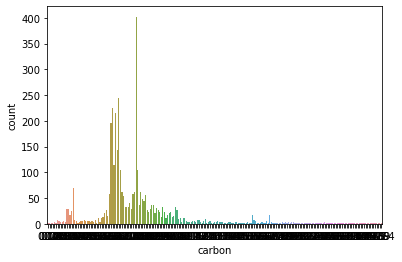

In [66]:

ax = sns.countplot(x = allData["carbon"])  
plt.show()

In [23]:
len(carbon['page'].unique())


2956

## Looking for correlations

In [6]:
import warnings
warnings.filterwarnings("ignore")

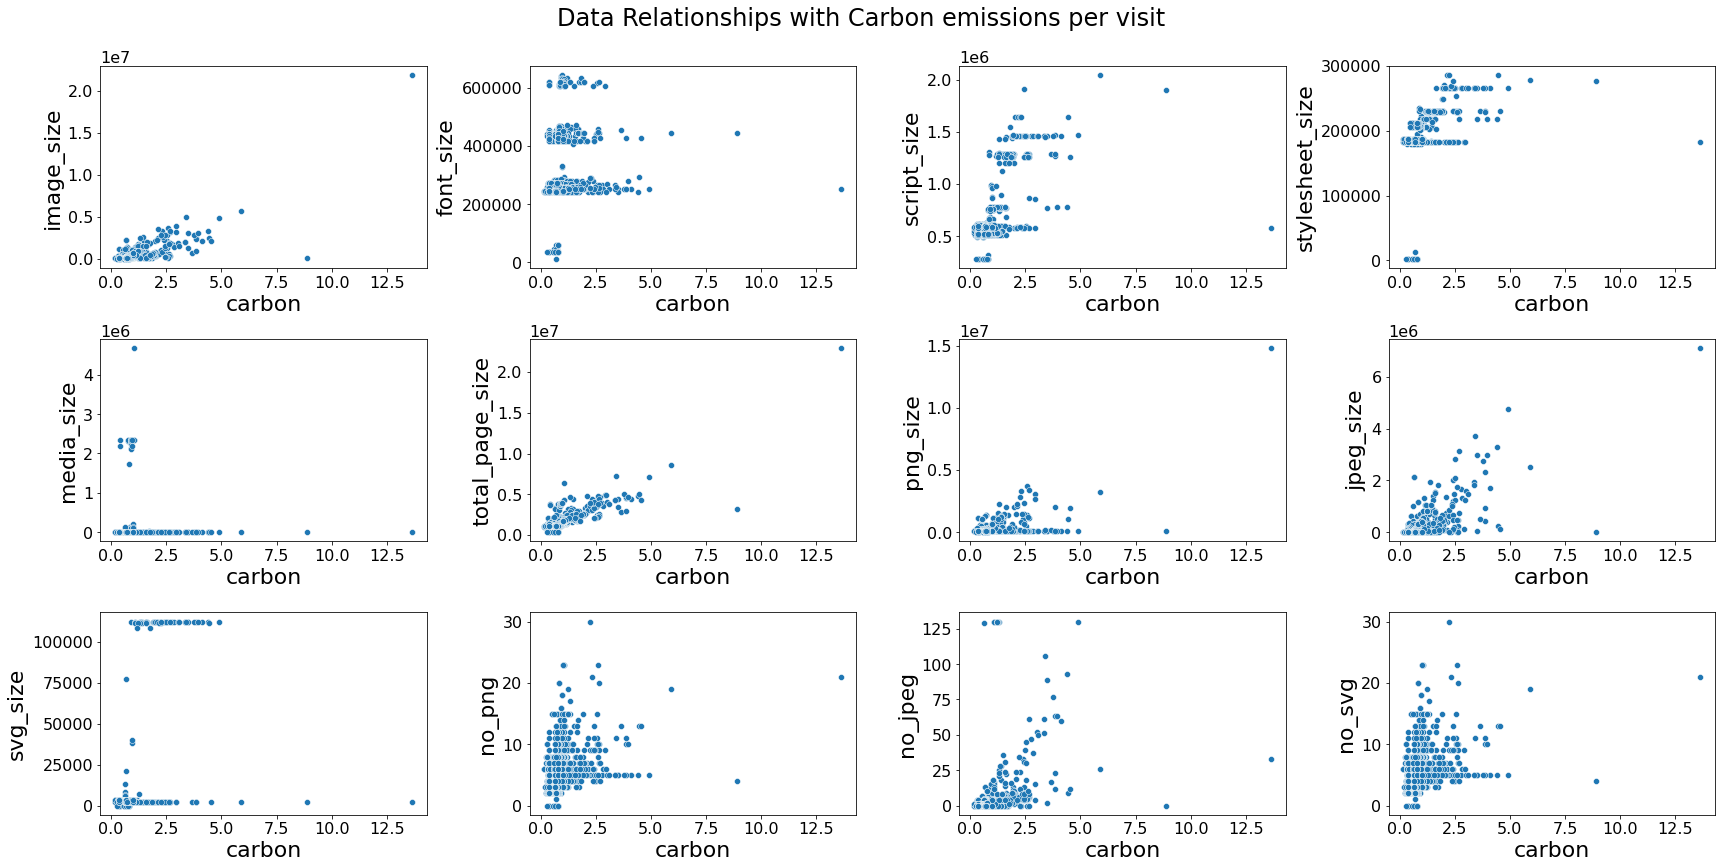

In [14]:

fig, axes = plt.subplots(figsize=(24,12))


fig.suptitle('Data Relationships with Carbon emissions per visit', y =1, size = 24)  
attributes = ['image_size', 'font_size', 'script_size', 'stylesheet_size',
        'media_size', 'total_page_size', 'png_size', 'jpeg_size', 'svg_size',
        'no_png', 'no_jpeg', 'no_svg'] # attributes to plot with carbon emissions per visit 
count=1
for i in attributes:
    plt.rc('axes', labelsize=22)
    plt.rc('ytick', labelsize=16)
    plt.rc('xtick', labelsize=16)
    plt.rc('axes', titlesize=22)
    plt.subplot(3,4, count)
    #axes.get_xaxis().get_major_formatter().set_scientific(True)
    g = sns.scatterplot(allData["carbon"],allData[i])
  
    #ylabels = [ '{:.1e}'.format(x)+'K' for x in g.get_yticks() if x>1000 ]
    #g.set_yticklabels(ylabels)
    
    
    count+=1


fig.tight_layout(pad=1.0)
fig.savefig('lighthousedata')

plt.show()

In [56]:
corr_matrix = allData.corr(method="spearman")

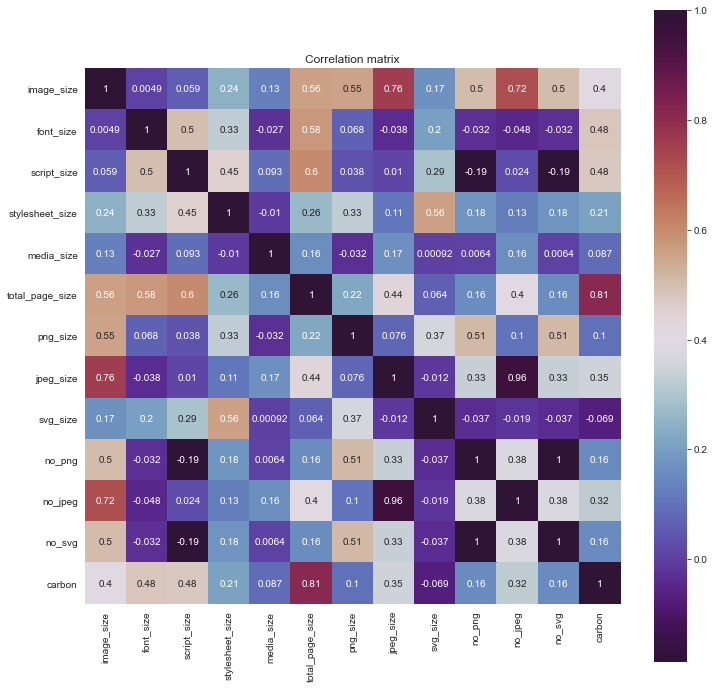

In [57]:
plt.figure(figsize=(12,12))
plt.title('Correlation matrix')
sns.heatmap(corr_matrix,square=True,annot=True,cmap= 'twilight_shifted')
plt.savefig('Correlation Matrix .png') 

In [80]:
allData.corr(method="spearman")['carbon'],allData.columns

(image_size         0.402477
 font_size          0.481650
 script_size        0.475791
 stylesheet_size    0.208863
 media_size         0.086603
 total_page_size    0.809353
 png_size           0.100429
 jpeg_size          0.350543
 svg_size          -0.069220
 no_png             0.156406
 no_jpeg            0.323634
 no_svg             0.156406
 carbon             1.000000
 Name: carbon, dtype: float64,
 Index(['url', 'image_size', 'font_size', 'script_size', 'stylesheet_size',
        'media_size', 'total_page_size', 'png_size', 'jpeg_size', 'svg_size',
        'no_png', 'no_jpeg', 'no_svg', 'page', 'carbon'],
       dtype='object'))

In [15]:
allData.corr()['carbon']

image_size         0.750202
font_size          0.149020
script_size        0.632964
stylesheet_size    0.387687
media_size         0.008729
total_page_size    0.833047
png_size           0.573968
jpeg_size          0.656451
svg_size           0.388103
no_png             0.295660
no_jpeg            0.318493
no_svg             0.295660
carbon             1.000000
Name: carbon, dtype: float64

<Figure size 432x288 with 0 Axes>

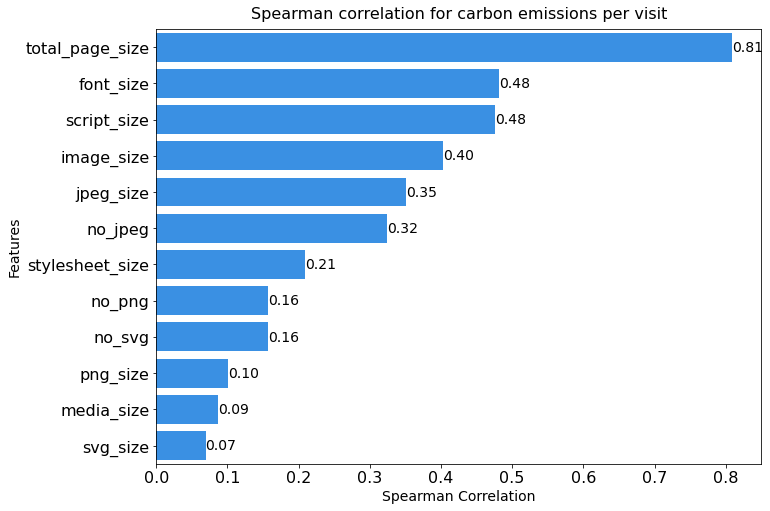

In [34]:

corr = abs(allData.corr(method="spearman")['carbon'].drop('carbon'))
attributes = ['image_size', 'font_size', 'script_size', 'stylesheet_size',
        'media_size', 'total_page_size', 'png_size', 'jpeg_size', 'svg_size',
        'no_png', 'no_jpeg', 'no_svg']


features = pd.DataFrame({"Spearman Corr":corr,
                  "Feature":attributes})
features_sorted_desc= features.sort_values('Spearman Corr',ascending=False)
fig = plt.figure()
plt.figure(figsize = (14,8))
plt.subplots_adjust(left=0.3)
#plt.barh('Feature','Pearson Corr',data = features_sorted_desc)
t=sns.barplot(data=features_sorted_desc, x='Spearman Corr', y='Feature', color = 'dodgerblue' )
plt.bar_label(t.containers[0], fmt='%.2f',fontsize=14)

plt.title('')
plt.ylabel('Features')
plt.xlabel('Spearman Correlation')
plt.title('Spearman correlation for carbon emissions per visit', y =1.01, size = 16)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)

fig.suptitle('', fontsize=16, fontweight='bold')



fig.tight_layout(pad=1.0)
plt.savefig('Spearman Correlation .png') 